In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

In [2]:
import sklearn
from sklearn import *
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PassiveAggressiveRegressor, SGDRegressor
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from xgboost import XGBRFRegressor, XGBRegressor

In [3]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
251,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family


In [4]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
351,120,RL,NaN,5271,Pave,NaN,IR1,Low,AllPub,Inside,...,184,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1335,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal


In [5]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.639555,70.070084,10571.099315,6.111301,5.580479,1971.338185,1984.757705,106.423408,454.921233,50.181507,...,473.848459,96.980308,48.553082,21.883562,3.708904,14.327911,2.511130,47.400685,6.352740,2007.793664
std,41.928503,24.540133,10705.078908,1.393931,1.102476,30.057606,20.585817,188.275783,466.662012,168.544827,...,214.378934,127.550613,68.910152,61.477692,31.375125,54.472853,38.809974,546.876716,2.730492,1.329023
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,...,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9491.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,388.500000,0.000000,...,478.000000,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2003.000000,164.750000,732.000000,0.000000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [6]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,292.000000,245.000000,292.000000,292.000000,292.000000,292.000000,292.000000,290.000000,292.000000,292.000000,...,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000
mean,57.928082,69.971429,10299.743151,6.051370,5.554795,1970.986301,1985.297945,92.713793,398.513699,32.020548,...,469.506849,83.30137,39.089041,22.236301,2.212329,17.993151,3.750000,27.842466,6.198630,2007.90411
std,43.815902,23.309992,6313.657852,1.339628,1.154884,30.827975,20.912112,148.493138,408.771065,127.633063,...,211.822244,115.63064,53.799222,59.766289,18.968489,60.635296,45.295166,185.436614,2.594257,1.32296
min,20.000000,21.000000,1477.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000
25%,20.000000,59.000000,7545.000000,5.000000,5.000000,1953.750000,1967.000000,0.000000,0.000000,0.000000,...,352.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.00000
50%,50.000000,70.000000,9434.500000,6.000000,5.000000,1971.500000,1994.000000,0.000000,351.000000,0.000000,...,480.000000,0.00000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000
75%,75.000000,82.000000,11885.750000,7.000000,6.000000,2003.000000,2005.000000,173.500000,677.000000,0.000000,...,578.250000,150.75000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000
max,190.000000,182.000000,57200.000000,10.000000,9.000000,2009.000000,2009.000000,1170.000000,1767.000000,1063.000000,...,1356.000000,635.00000,291.000000,386.000000,196.000000,440.000000,576.000000,2000.000000,12.000000,2010.00000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1380 to 906
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    245 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          21 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBui

In [9]:
X_train.isna().sum().sort_values(ascending=False).iloc[0:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [10]:
X_test.isna().sum().sort_values(ascending=False).iloc[0:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageCond       20
GarageFinish     20
BsmtFinType2      9
BsmtCond          8
BsmtFinType1      8
BsmtQual          8
BsmtExposure      8
MasVnrArea        2
MasVnrType        2
BedroomAbvGr      0
BsmtFullBath      0
dtype: int64

In [11]:
X_train.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)
X_test.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [12]:
col_impute = X_train.isna().sum().sort_values(ascending=False).iloc[0:15].index

In [13]:
X_train[col_impute].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   615 non-null    object 
 1   LotFrontage   956 non-null    float64
 2   GarageType    1107 non-null   object 
 3   GarageYrBlt   1107 non-null   float64
 4   GarageFinish  1107 non-null   object 
 5   GarageQual    1107 non-null   object 
 6   GarageCond    1107 non-null   object 
 7   BsmtExposure  1138 non-null   object 
 8   BsmtQual      1139 non-null   object 
 9   BsmtCond      1139 non-null   object 
 10  BsmtFinType1  1139 non-null   object 
 11  BsmtFinType2  1139 non-null   object 
 12  MasVnrType    1162 non-null   object 
 13  MasVnrArea    1162 non-null   float64
 14  Electrical    1167 non-null   object 
dtypes: float64(3), object(12)
memory usage: 146.0+ KB


In [14]:
col_impute = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for i in range(len(col_impute)):

    X_train[col_impute[i]].fillna(X_train[col_impute[i]].median(), inplace=True)
    X_test[col_impute[i]].fillna(X_train[col_impute[i]].median(), inplace=True)

In [15]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
model_list = [AdaBoostRegressor(random_state=0), ExtraTreesRegressor(random_state=0), GradientBoostingRegressor(random_state=0), 
              RandomForestRegressor(random_state=0), LinearRegression(), Ridge(), Lasso(), PassiveAggressiveRegressor(), SGDRegressor(),
              DecisionTreeRegressor(random_state=0), SVR(), XGBRFRegressor(random_state=0), XGBRegressor(random_state=0)]

for i in range(len(model_list)):
    clf = model_list[i]
    clf.fit(X_tra, y_tra.iloc[:,1])
    print(model_list[i],":",mean_squared_log_error(y_val.iloc[:,1], clf.predict(X_val)))

AdaBoostRegressor(random_state=0) : 0.0283433408035302
ExtraTreesRegressor(random_state=0) : 0.019407600369342252
GradientBoostingRegressor(random_state=0) : 0.01709699099827311
RandomForestRegressor(random_state=0) : 0.02195855246236564
LinearRegression() : 0.03236574072858561
Ridge() : 0.03232424671038992
Lasso() : 0.032360237804042666
PassiveAggressiveRegressor() : 0.02458412613276571
SGDRegressor() : 0.03199872083189918
DecisionTreeRegressor(random_state=0) : 0.0418598306065133
SVR() : 0.1546482430138364
XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_

- ExtraTreesRegressor(random_state=0) : 0.019407600369342252
- GradientBoostingRegressor(random_state=0) : 0.01709699099827311

구체화

In [19]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(ExtraTreesRegressor(random_state=0) , parameters)
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.8464255449458221
{'max_depth': 15, 'n_estimators': 300}


In [20]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=0) , parameters)
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.8488327725034834
{'max_depth': 5, 'n_estimators': 100}


In [21]:
clf = GradientBoostingRegressor(random_state=0, max_depth= 5, n_estimators= 100)
clf.fit(X_train, y_train.iloc[:,1])
pred = y_test.copy()
pred.iloc[:,1] = clf.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test.iloc[:,1], pred.iloc[:,1]))

24052.71484571434

In [23]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

# Data Load & Simple EDA

In [24]:
import pandas as pd

In [25]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [26]:
pd.set_option("display.max_columns", 100)
display(X_train.head(3))
display(X_test.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,983,1683,GasA,Ex,Y,SBrkr,2129,743,0,2872,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


<AxesSubplot:>

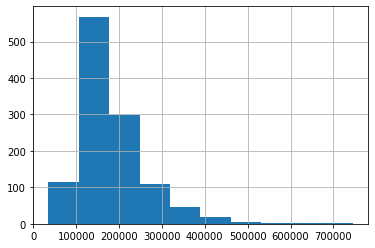

In [27]:
y_train['SalePrice'].hist()

<AxesSubplot:>

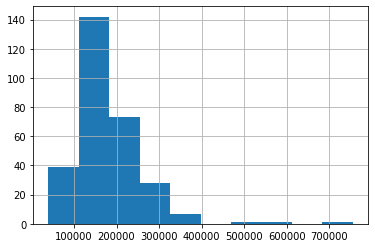

In [28]:
y_test['SalePrice'].hist()

In [29]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [30]:
X_test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageCond       20
GarageFinish     20
BsmtFinType2      9
BsmtCond          8
BsmtFinType1      8
BsmtQual          8
BsmtExposure      8
MasVnrArea        2
MasVnrType        2
BedroomAbvGr      0
BsmtFullBath      0
dtype: int64

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

# Preprocessing

In [32]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

In [33]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [34]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

# Model

In [35]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_tr, y_tr, verbose=False)
pred = model.predict(X_val)

In [36]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print("RMSLE : " + str(rmsle(y_val, pred)))

RMSLE : 31827.55779287209


# Simple Preprocessing

In [37]:
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

idx1 = y_train['SalePrice'].quantile(0.005)>y_train['SalePrice']
idx2 = y_train['SalePrice'].quantile(0.995)<y_train['SalePrice']

y_train = y_train[~(idx1 + idx2)]
X_train = X_train[~(idx1 + idx2)]

X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=20222)

model = XGBRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("RMSLE : " + str(rmsle(y_val, pred)))

RMSLE : 24458.0661240587


## Simple Tuning

In [38]:
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

idx1 = y_train['SalePrice'].quantile(0.005)>y_train['SalePrice']
idx2 = y_train['SalePrice'].quantile(0.995)<y_train['SalePrice']

y_train = y_train[~(idx1 + idx2)]
X_train = X_train[~(idx1 + idx2)]

X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=20222)

model = XGBRegressor(n_estimators=100, max_depth=4, colsample_bytree=0.9)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("RMSLE : " + str(rmsle(y_val, pred)))

RMSLE : 23496.232608976705


# Predict & to CSV

In [39]:
pred = model.predict(X_test)
output = pd.DataFrame({'Id': y_test['Id'], 'SalePrice': pred})
output.head()

,Id,SalePrice
1380,1381,90000.382812
520,521,115919.937500
1175,1176,305514.906250
351,352,210479.046875
1335,1336,154336.343750


In [40]:
#output.to_csv("000000.csv", index=False)

# 결과 체점

In [41]:
pred = model.predict(X_test)
print("RMSLE : " + str(rmsle(y_test['SalePrice'], pred)))

RMSLE : 32010.88466361228
